In [1]:
import numpy as np
import torch
import matplotlib.pylab as pl
import ot
from matplotlib.lines import Line2D
import ot.plot
from matplotlib.patches import Rectangle as rec

In [2]:
import sys
sys.path.append('../../code/')

In [3]:
from generate_data import make_data
from linear_solver import OT

In [4]:
def kernel_gauss(X,Y,sigma=1):
    return torch.exp(-ot.dist(X,Y)/(2*sigma**2))
def KL(a,b):
    return torch.sum(a*torch.log(a/b))-torch.sum(a)+torch.sum(b)
def l2(a,b):
    I=torch.eye(a.shape[0])
    return (a-b)@I@(a-b)
def KKL(a,b,K):
    return a@K@torch.log(a)-a@K@torch.log(b)-torch.sum(a@K)+torch.sum(b@K)
def KKL(a,b,K):
    return a@K@torch.log(a)-a@K@torch.log(b)-a@K@torch.log(a)+torch.sum(K@(a*torch.log(a)-a))+b@K@torch.log(b)-torch.sum(K@(b*torch.log(b)-b))
def KKL(a,b,K):
    return torch.sum(K@(a*torch.log(a/b)-a+b))

def MMD(a,b,K):
    #return a@K@a+b@K@b-2*(a@K@b)
    return (a-b)@K@(a-b)

In [5]:
bl="#4A90E2"
o='#F5A623'
v="#7ED321"
r="#D0021B"

In [6]:
np.random.seed(0)
n=50
dim=2
X,_=make_data('iso_gaussians',n,dim)
X[-1,:]=torch.tensor([-6,-6])
X[-2,:]=torch.tensor([6,6])
Y=torch.clone(X)

a1=torch.ones((n,))
b1=torch.ones((n,))
b1[-2]=5e-2
b1[-1]=5e-2

a2=torch.ones((n,))
b2=torch.ones((n,))
b2[1]=5e-2
b2[0]=5e-2


In [7]:
K=kernel_gauss(X,X,sigma=1e0)

KKL1=KKL(a1,b1,K)
KL1=KL(a1,b1)
print(KKL1,KL1)

MMD1=MMD(a1,b1,K)
l21=l2(a1,b1)
print(MMD1,l21)

tensor(4.0915) tensor(4.0915)
tensor(1.8050) tensor(1.8050)


In [8]:
KKL2=KKL(a2,b2,K)
KL2=KL(a2,b2)
print(KKL2,KL2)

MMD2=MMD(a2,b2,K)
l22=l2(a2,b2)
print(MMD2,l22)

tensor(33.6478) tensor(4.0915)
tensor(2.0487) tensor(1.8050)


In [9]:
print(KKL2-KKL1)
print(MMD2-MMD1)

tensor(29.5563)
tensor(0.2437)


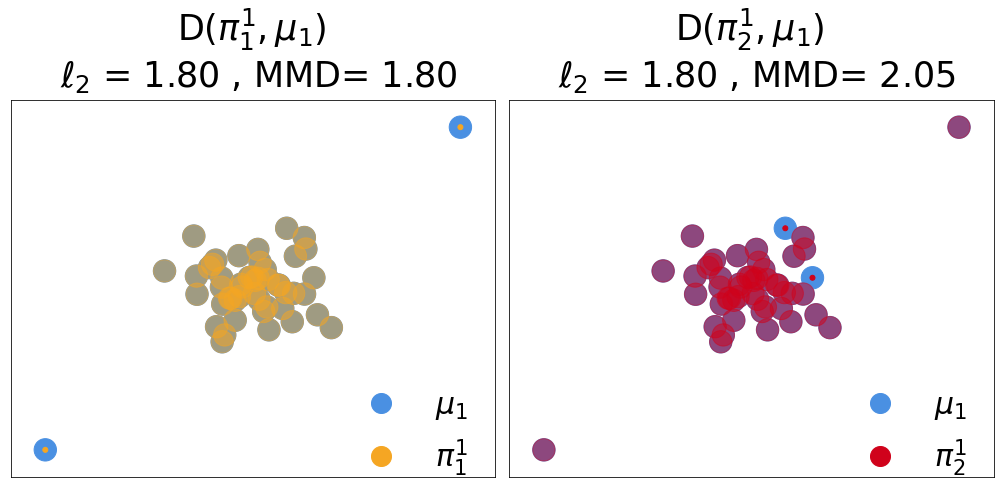

In [15]:
s=5e2
pl.figure(figsize=(14,7))

ax=pl.subplot(1,2,1)
pl.scatter(X[:, 0], X[:, 1], c=bl,s=a1*s,alpha=1)
pl.scatter(Y[:-2, 0], Y[:-2, 1], c=o, label='',s=b1[:-2]*s,alpha=.5)
pl.scatter(Y[-2:, 0], Y[-2:, 1], c=o, label='',s=b1[-2:]*s,alpha=1)
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_xticklabels([])
pl.tight_layout()
pl.xlim(-7,7)
pl.ylim(-7,7)
pl.title("D($\pi^1_1,\mu_1)$ \n $\ell_2$ = %1.2f"%l21 +" , MMD= %1.2f"%MMD1,size=35,x=.5,y=1.02)

label1 = Line2D([0], [0], label="$\mu_1$", marker='o', color=bl, linestyle='',markersize=20)
label2 = Line2D([0], [0], label="$\pi^1_1$", marker='o', color=o, linestyle='',markersize=20)
label3 = Line2D([0], [0], label="$\pi^1_2$", marker='o', color=r, linestyle='',markersize=20)
handles, labels = pl.gca().get_legend_handles_labels()
handles.extend([label1,label2])
pl.tight_layout()
pl.legend(frameon=False,handles=handles,bbox_to_anchor=(1,.3), prop={'size': 30})

ax=pl.subplot(1,2,2)
pl.scatter(X[:, 0], X[:, 1], c=bl,s=a2*s,alpha=1)
pl.scatter(Y[:2, 0], Y[:2, 1], c=r, label='',s=b2[:2]*s,alpha=1)
pl.scatter(Y[2:, 0], Y[2:, 1], c=r, label='',s=b2[2:]*s,alpha=.5)
pl.xlim(-7,7)
pl.ylim(-7,7)
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_xticklabels([])
pl.tight_layout()
pl.title("D($\pi^1_2,\mu_1)$ \n $\ell_2$ = %1.2f"%l22 +" , MMD= %1.2f"%MMD2,size=35,x=.5,y=1.02)
handles, labels = pl.gca().get_legend_handles_labels()
handles.extend([label1,label3])
pl.tight_layout()
pl.legend(frameon=False,handles=handles,bbox_to_anchor=(1,.3), prop={'size': 30})


pl.savefig("../../Figures/UOT/Distributions_MMD.pdf",bbox_inches='tight')

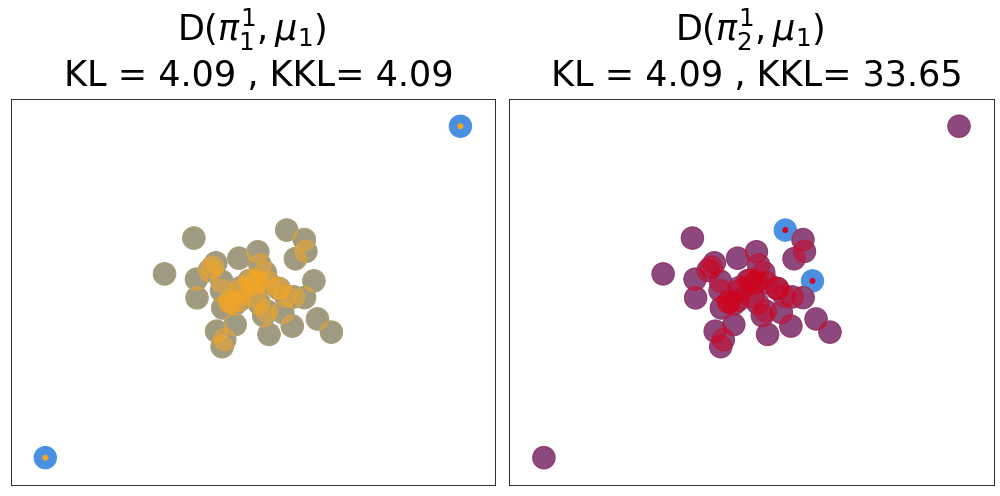

In [17]:
s=5e2
pl.figure(figsize=(14,7))
ax=pl.subplot(1,2,1)
pl.scatter(X[:, 0], X[:, 1], c=bl,s=a1*s,alpha=1)
pl.scatter(Y[:-2, 0], Y[:-2, 1], c=o, label='',s=b1[:-2]*s,alpha=.5)
pl.scatter(Y[-2:, 0], Y[-2:, 1], c=o, label='',s=b1[-2:]*s,alpha=1)
pl.xlim(-7,7)
pl.ylim(-7,7)
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_xticklabels([])
pl.title("D($\pi^1_1,\mu_1)$ \n KL = %1.2f"%KL1+" , KKL= %1.2f"%KKL1,size=35,x=.5,y=1.02)
#pl.title("D($a,b_1)$ \n KL = %1.2f"%KL1 +" , KKL= %1.2f"%KKL1,size=25,x=.5,y=.8)

ax=pl.subplot(1,2,2)
pl.scatter(X[:, 0], X[:, 1], c=bl,s=a2*s,alpha=1)
pl.scatter(Y[:2, 0], Y[:2, 1], c=r, label='',s=b2[:2]*s,alpha=1)
pl.scatter(Y[2:, 0], Y[2:, 1], c=r, label='',s=b2[2:]*s,alpha=.5)
pl.xlim(-7,7)
pl.ylim(-7,7)
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_xticklabels([])
pl.title("D($\pi^1_2,\mu_1)$ \n KL = %1.2f"%KL2+" , KKL= %1.2f"%KKL2,size=35,x=.5,y=1.02)
#pl.title("D($a,b_2)$ \n KL = %1.2f"%KL2 +" , KKL= %1.2f"%KKL2,size=25,x=.5,y=.8)

label1 = Line2D([0], [0], label="$a$", marker='o', color=bl, linestyle='',markersize=15)
label2 = Line2D([0], [0], label="$b1$", marker='o', color=o, linestyle='',markersize=15)
label3 = Line2D([0], [0], label="$b_2$", marker='o', color=r, linestyle='',markersize=15)
handles, labels = pl.gca().get_legend_handles_labels()
handles.extend([label1,label2,label3])
pl.tight_layout()
#pl.legend(handles=handles,bbox_to_anchor=(.1,.7), prop={'size': 25})
pl.savefig("../../Figures/UOT/Distributions_KKL.pdf",bbox_inches='tight')

In [18]:
nb_sigma=1000
sigma_l = np.logspace(-5, 2, nb_sigma)
#print('Grid sigma',sigma_l)
KKL_l=torch.zeros((nb_sigma,2))
MMD_l=torch.zeros((nb_sigma,2))
for i,s in enumerate(sigma_l):
    K=kernel_gauss(X,X,sigma=s)
    KKL_l[i,0]=KKL(a1,b1,K)
    MMD_l[i,0]=MMD(a1,b1,K)
    KKL_l[i,1]=KKL(a2,b2,K)
    MMD_l[i,1]=MMD(a2,b2,K)

In [19]:
torch.max(KKL_l)

tensor(204.4784)

<Figure size 504x504 with 0 Axes>

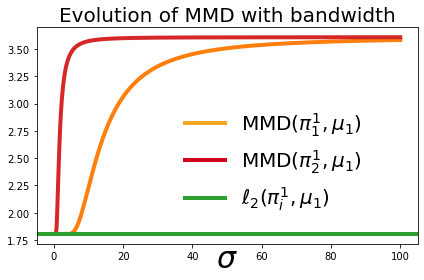

In [22]:
pl.figure(figsize=(7,7))
fig, ax = pl.subplots()
pl.plot(sigma_l,MMD_l[:,0],c="C1",linewidth=4)
pl.plot(sigma_l,MMD_l[:,1],c="C3",linewidth=4)
pl.axhline(y=l2(a1,b1), color='C2', linestyle='-',linewidth=4)
#pl.axhline(y=MMD(a1,b1,torch.ones((n,n))), color='C2', linestyle='-')
pl.xlabel("$\sigma$",size=30)
ax.xaxis.set_label_coords(.5, 0)
pl.title("Evolution of MMD with bandwidth",size=20)


label1 = Line2D([0], [0], label="MMD($\pi^1_1,\mu_1$)", color=o, linestyle='solid',alpha=1,linewidth=4)
label2 = Line2D([0], [0], label="MMD($\pi^1_2,\mu_1$)", color=r, linestyle='solid',alpha=1,linewidth=4)
label3 = Line2D([0], [0], label="$\ell_2(\pi^1_i,\mu_1$)", color='C2', linestyle='solid',alpha=1,linewidth=4)
handles, labels = pl.gca().get_legend_handles_labels()
handles.extend([label1,label2,label3])
#pl.axis('off')
pl.tight_layout()
pl.legend(frameon=False,handles=handles,bbox_to_anchor=(.9,.7), prop={'size': 20})
pl.savefig("../../Figures/UOT/Bandwidth_MMD.pdf",bbox_inches='tight')

<Figure size 504x504 with 0 Axes>

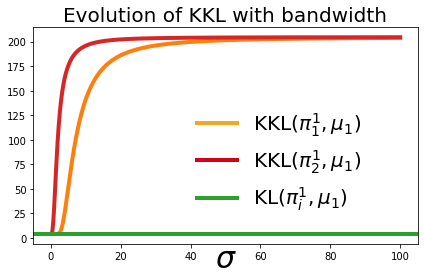

In [24]:
pl.figure(figsize=(7,7))
fig, ax = pl.subplots()
pl.plot(sigma_l,KKL_l[:,0],c="C1",linewidth=4)
pl.plot(sigma_l,KKL_l[:,1],c="C3",linewidth=4)
pl.axhline(y=KL(a1,b1), color='C2', linestyle='-',linewidth=4)
#pl.axhline(y=KKL(a1,b1,torch.ones((n,n))), color='C2', linestyle='-')
pl.xlabel("$\sigma$",size=30)
ax.xaxis.set_label_coords(.5, 0)
pl.title("Evolution of KKL with bandwidth",size=20)


label1 = Line2D([0], [0], label="KKL($\pi^1_1,\mu_1$)", color=o, linestyle='solid',alpha=1,linewidth=4)
label2 = Line2D([0], [0], label="KKL($\pi^1_2,\mu_1$)", color=r, linestyle='solid',alpha=1,linewidth=4)
label3 = Line2D([0], [0], label="KL$(\pi^1_i,\mu_1$)", color='C2', linestyle='solid',alpha=1,linewidth=4)
handles, labels = pl.gca().get_legend_handles_labels()
handles.extend([label1,label2,label3])
#pl.axis('off')
pl.tight_layout()
pl.legend(frameon=False,handles=handles,bbox_to_anchor=(.9,.7), prop={'size': 20})
pl.savefig("../../Figures/UOT/Bandwidth_KKL.pdf",bbox_inches='tight')

In [25]:
nb_sigma=1000
sigma_l = np.logspace(-5, 1.7, nb_sigma)
#print('Grid sigma',sigma_l)
KKL_l=torch.zeros(nb_sigma)
MMD_l=torch.zeros(nb_sigma)
for i,s in enumerate(sigma_l):
    K=kernel_gauss(X,X,sigma=s)
    KKL_l[i]=KKL(a2,b2,K)-KKL(a1,b1,K)
    MMD_l[i]=MMD(a2,b2,K)-MMD(a1,b1,K)

idx_MMD=np.argmax(MMD_l)
idx_KKL=np.argmax(KKL_l)
sigma_MMD=sigma_l[idx_MMD]
sigma_KKL=sigma_l[idx_KKL]

In [26]:
print(sigma_MMD,sigma_KKL)

5.768475614711258 3.6296091397487618


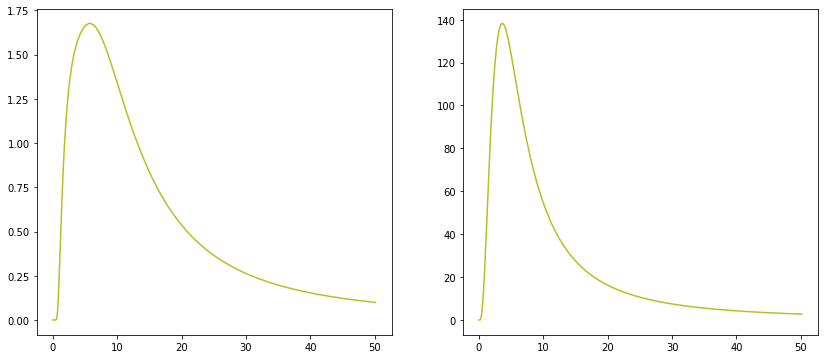

In [27]:
pl.figure(figsize=(14,6))
pl.subplot(1,2,1)
pl.plot(sigma_l,MMD_l,c="C8")
pl.subplot(1,2,2)
pl.plot(sigma_l,KKL_l,c="C8")

<Figure size 504x504 with 0 Axes>

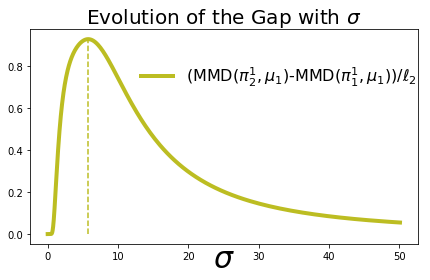

In [29]:
pl.figure(figsize=(7,7))
fig, ax = pl.subplots()
pl.plot(sigma_l,MMD_l/l2(a1,b1),c="C8",linewidth=4)
pl.vlines(x=sigma_MMD,ymin=0,ymax=float(MMD_l[idx_MMD])/l2(a1,b1), color='C8', linestyle='--')
pl.xlabel("$\sigma$",size=30)
ax.xaxis.set_label_coords(.5, 0)
pl.title("Evolution of the Gap with $\sigma$",size=20)

label1 = Line2D([0], [0], label="(MMD($\pi^1_2,\mu_1$)-MMD($\pi^1_1,\mu_1$))/$\ell_2$", color='C8', linestyle='solid',alpha=1,linewidth=4)
handles, labels = pl.gca().get_legend_handles_labels()
handles.extend([label1])
#pl.axis('off')
pl.tight_layout()
pl.legend(frameon=False,handles=handles,bbox_to_anchor=(.25,.9), prop={'size': 16})
pl.savefig("../../Figures/UOT/Gap_MMD.pdf",bbox_inches='tight')

<Figure size 504x504 with 0 Axes>

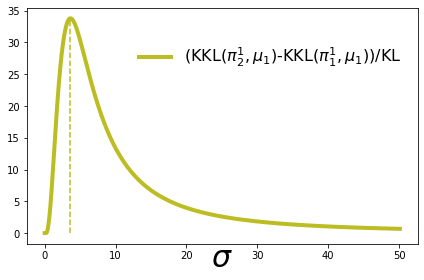

In [30]:
pl.figure(figsize=(7,7))
fig, ax = pl.subplots()
pl.plot(sigma_l,KKL_l/KL(a1,b1),c="C8",linewidth=4)
pl.vlines(x=sigma_KKL,ymin=0,ymax=float(KKL_l[idx_KKL])/KL(a1,b1), color='C8', linestyle='--')
pl.xlabel("$\sigma$",size=30)
ax.xaxis.set_label_coords(.5, 0)
#pl.title("KKL$(a,b_2)$-KKL($a,b_1$) normalize by KL",size=20)


label1 = Line2D([0], [0], label="(KKL($\pi^1_2,\mu_1$)-KKL($\pi^1_1,\mu_1$))/KL", color='C8', linestyle='solid',alpha=1,linewidth=4)
handles, labels = pl.gca().get_legend_handles_labels()
handles.extend([label1])
#pl.axis('off')
pl.tight_layout()
pl.legend(frameon=False,handles=handles,bbox_to_anchor=(.25,.9), prop={'size': 16})
pl.savefig("../../Figures/UOT/Gap_KKL.pdf",bbox_inches='tight')

# OT

In [14]:
np.random.seed(0)
n=50
dim=2
X,_=make_data('iso_gaussians',n,dim)
X[-1,:]=torch.tensor([-6,-6])
Y=torch.clone(X)

b1=torch.ones((n,))
b1[-1]=5e-2
a1=(torch.sum(b1)*torch.ones((n,)))/n

b2=torch.ones((n,))
b2[0]=5e-2
a2=(torch.sum(b2)*torch.ones((n,)))/n

In [15]:
torch.sum(b1),torch.sum(a1),torch.sum(a2),torch.sum(b2)

(tensor(49.0500), tensor(49.0500), tensor(49.0500), tensor(49.0500))

In [16]:
C=ot.dist(X,Y)
P1=OT(a1,b1,C)
P2=OT(a2,b2,C)

OT1=np.sum(C.numpy()*P1)
OT2=np.sum(C.numpy()*P2)

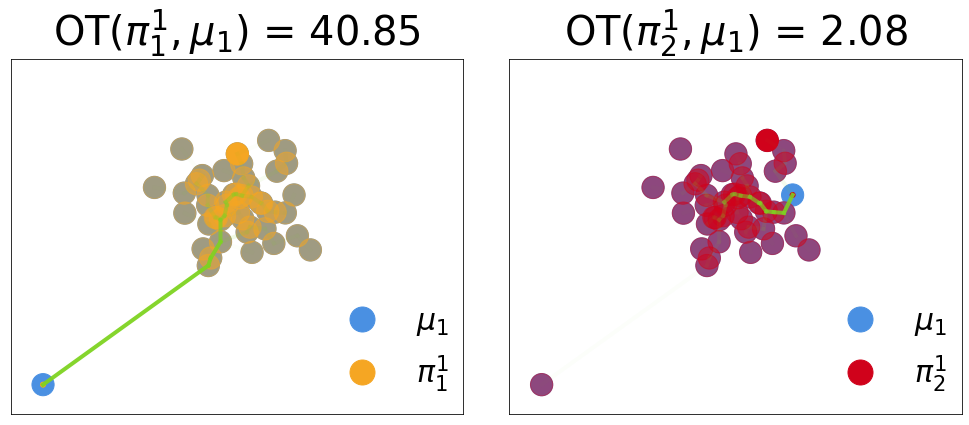

In [21]:
s=5e2
pl.figure(figsize=(14,6))
ax=pl.subplot(1,2,1)
ot.plot.plot2D_samples_mat(X, Y, P1, c=v,linewidth=4)
pl.scatter(X[:, 0], X[:, 1], c=bl,s=a1*s,alpha=1)
pl.scatter(Y[:-2, 0], Y[:-2, 1], c=o, label='',s=b1[:-2]*s,alpha=.5)
pl.scatter(Y[-2:, 0], Y[-2:, 1], c=o, label='',s=b1[-2:]*s,alpha=1)
pl.xlim(-7,7)
pl.ylim(-7,5)
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_xticklabels([])
pl.title("OT$(\pi^1_1,\mu_1)$ = %1.2f"%OT1,size=40,x=.5,y=1.02)

label1 = Line2D([0], [0], label="$\mu_1$", marker='o', color=bl, linestyle='',markersize=25)
label2 = Line2D([0], [0], label="$\pi^1_1$", marker='o', color=o, linestyle='',markersize=25)
label3 = Line2D([0], [0], label="$\pi^1_2$", marker='o', color=r, linestyle='',markersize=25)
handles, labels = pl.gca().get_legend_handles_labels()
handles.extend([label1,label2])
pl.legend(frameon=False,handles=handles,bbox_to_anchor=(.65,.38), prop={'size': 30})

ax=pl.subplot(1,2,2)
ot.plot.plot2D_samples_mat(X, Y, P2, c=v,linewidth=4)
pl.scatter(X[:, 0], X[:, 1], c=bl,s=a2*s,alpha=1)
pl.scatter(Y[:2, 0], Y[:2, 1], c=r, label='',s=b2[:2]*s,alpha=1)
pl.scatter(Y[2:, 0], Y[2:, 1], c=r, label='',s=b2[2:]*s,alpha=.5)
pl.xlim(-7,7)
pl.ylim(-7,5)
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_xticklabels([])
pl.title("OT$(\pi^1_2,\mu_1)$ = %1.2f"%OT2,size=40,x=.5,y=1.02)
handles, labels = pl.gca().get_legend_handles_labels()
handles.extend([label1,label3])
pl.legend(frameon=False,handles=handles,bbox_to_anchor=(.65,.38), prop={'size': 30})


pl.tight_layout()

pl.savefig("../../Figures/UOT/Density_OT.pdf",bbox_inches='tight')

(tensor(49.0500), tensor(50.))

(tensor(49.0500), tensor(49.0500))

In [87]:
P1